# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Python Course/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [6]:
# Write your code here
df.shape

(1898, 9)

#### Observations: There are 1898 rows and 9 columns present in the data.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [7]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: There are int64, object and float64 datatypes.
*  order_id, customer_id, food_preparation_time and delivery_time are int64 datatype.
*  restaurant_name, cuisine_type, day_of_the_week and rating are object datatype
*   cost_of_the_order is float64 datatype






### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [8]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: As all the values are 0, there seems to be no missing values. So, there are no missing values.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [9]:
# Write your code here
df.describe(include = "all")

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


#### Observations: The minimum time it takes for food to be prepared is 20 minutes. The average time it takes almost 27.372 minutes and the maximum time it takes for food to be preapred is 35 minutes.


### **Question 5:** How many orders are not rated?

In [13]:
# Write the code here
df["rating"].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations: There are about 736 orders which are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

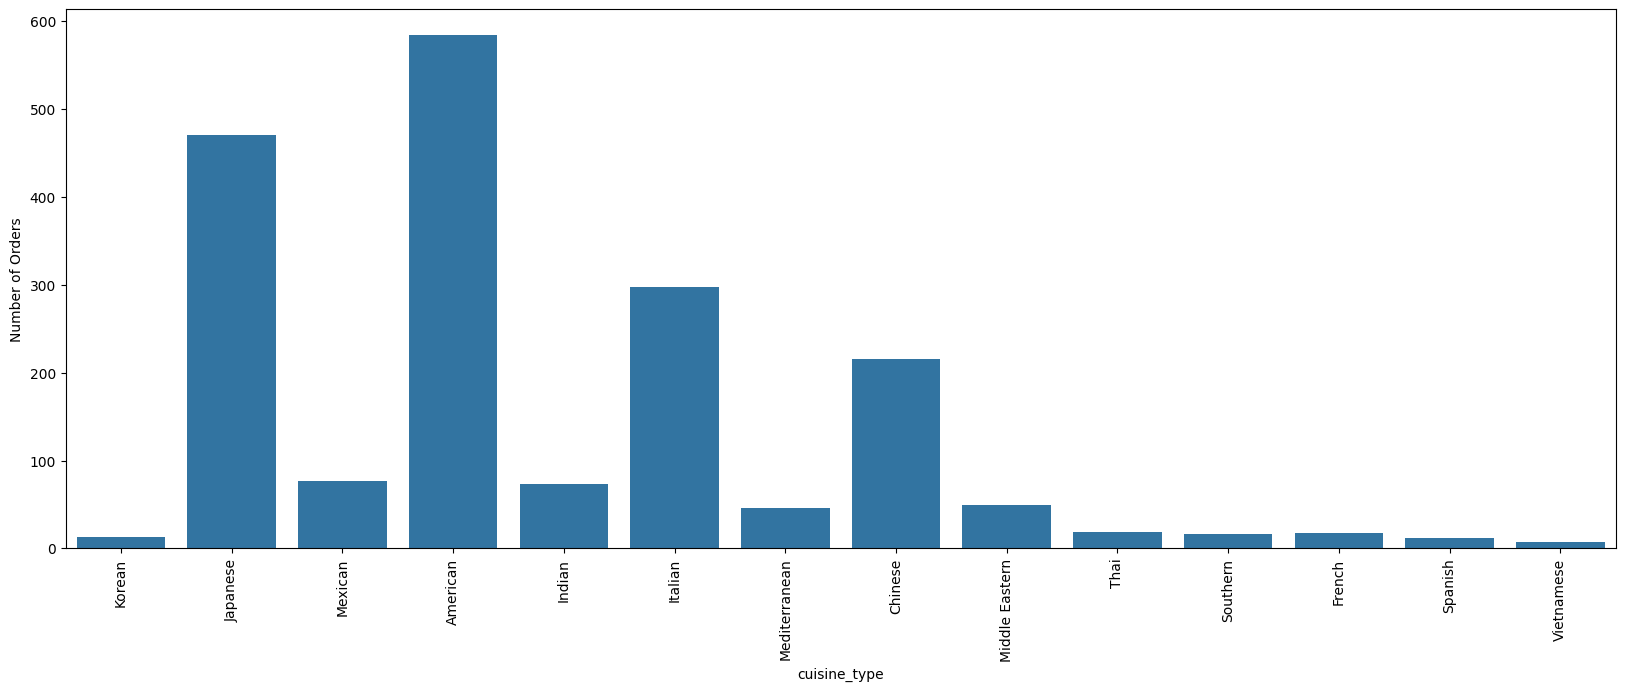

In [20]:
# Write the code here
plt.figure(figsize= (20, 7))
sns.countplot(data=df, x= "cuisine_type")
plt.xticks(rotation = 90)
plt.ylabel("Number of Orders")
plt.show()

In [19]:
df["cuisine_type"].value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

**Observation 1:** From the above observation, it can be seen that American, Japanese, Italian and Chinese are the most popular cuisine types and the Vietnamese is the least popular cuisine type.

In [27]:
Top_Restaurants = df["restaurant_name"].value_counts().head(5)
Top_Restaurants

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

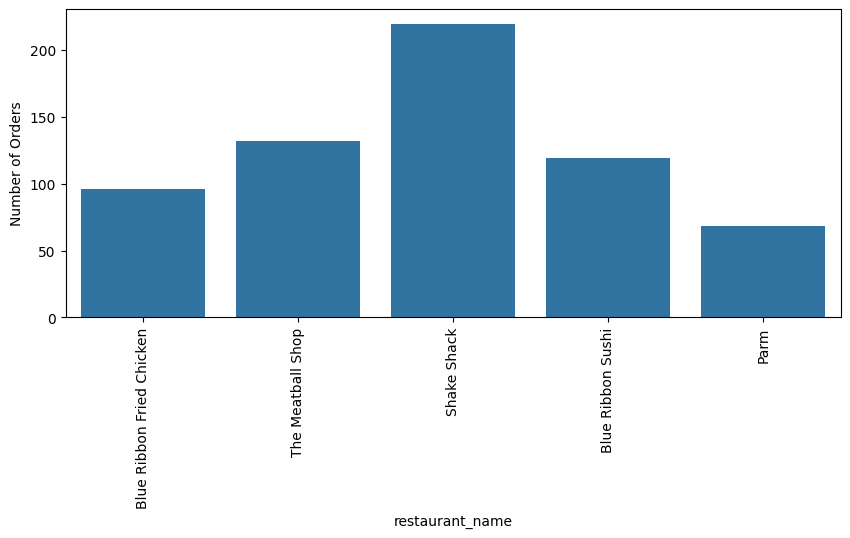

In [37]:
plt.figure(figsize= (10, 4))
sns.countplot(data=df[df['restaurant_name'].isin(["Shake Shack", "The Meatball Shop", "Blue Ribbon Sushi",
       "Blue Ribbon Fried Chicken", "Parm"])], x="restaurant_name")
plt.xticks(rotation = 90)
plt.ylabel("Number of Orders")
plt.show()

**Observation 2:** From the observation, top 5 restaurants have been plotted. Of them, Shake Shack is the most popular restaurant.

In [38]:
df["customer_id"].value_counts().head(10)

52832     13
47440     10
83287      9
250494     8
259341     7
82041      7
65009      7
276192     7
97079      6
97991      6
Name: customer_id, dtype: int64

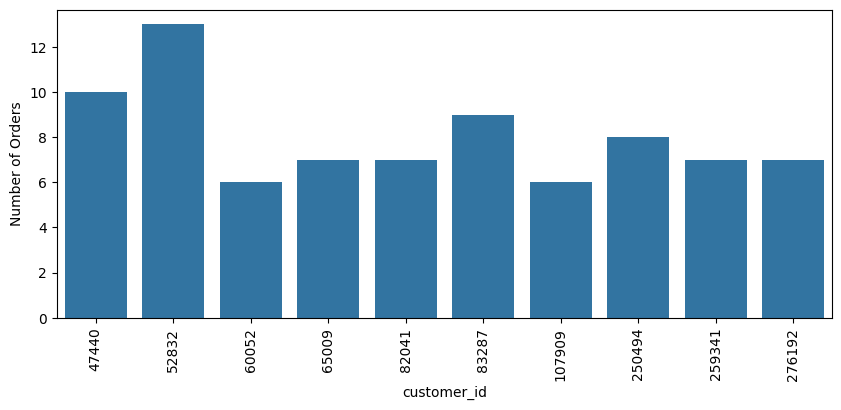

In [41]:
plt.figure(figsize= (10, 4))
sns.countplot(data=df[df['customer_id'].isin([52832, 47440, 83287, 250494, 259341, 65009, 82041, 276192, 107909,60052])], x='customer_id')
plt.xticks(rotation = 90)
plt.ylabel("Number of Orders")
plt.show()

**Observation 3:** From the above observation, it can be seen that customer_id 52832 is the most loyal customer.

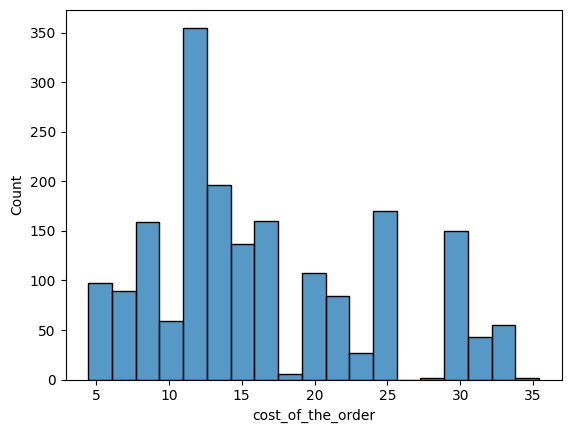

In [44]:
sns.histplot(data=df, x="cost_of_the_order")
plt.show()

Observation 4: From the above Boxplot, it can be seen that The most food items are valued between 10 to 15 dollars.

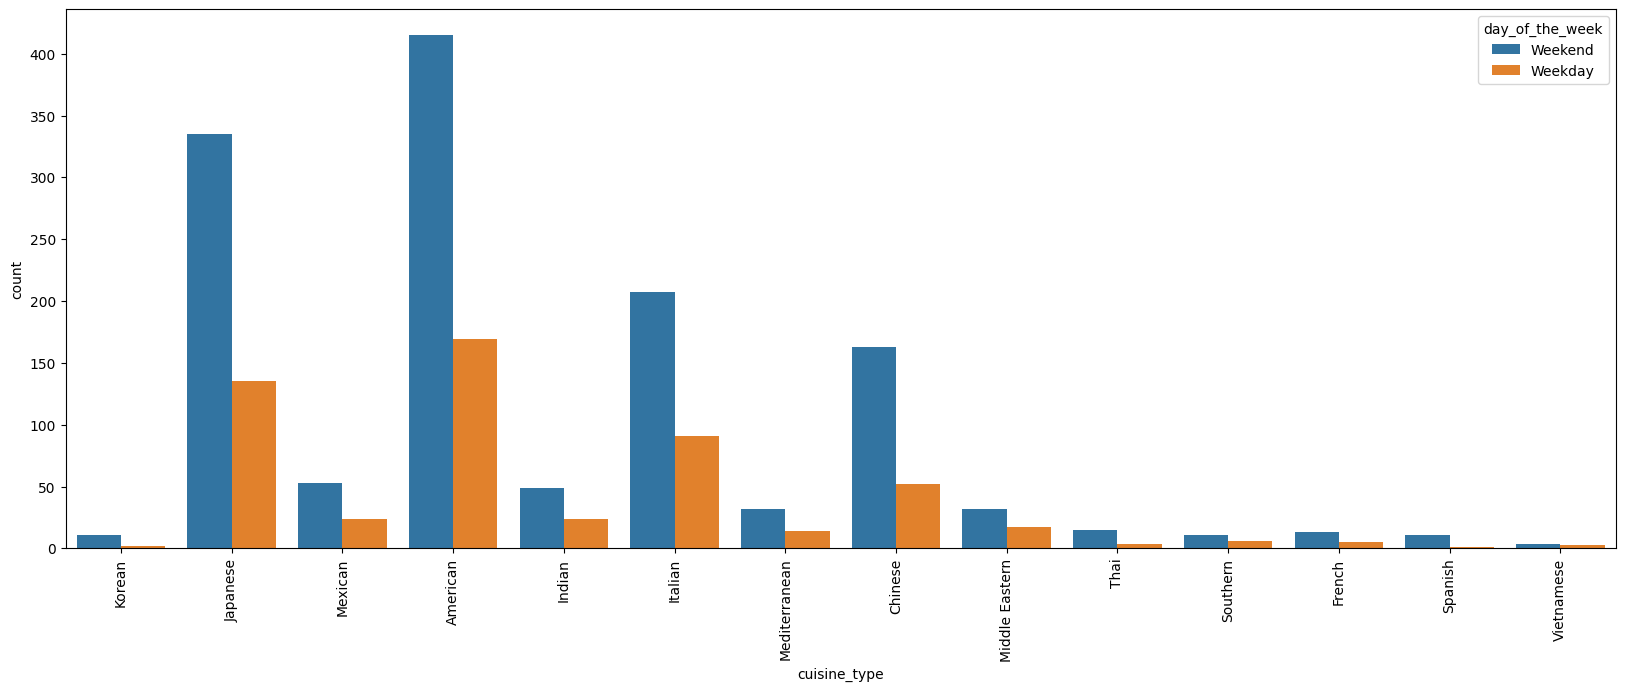

In [48]:
plt.figure(figsize=(20, 7))
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90);

**Observation 5:** From the above observation, it can be seen that lots of orders are placed in the weekends compare to the weekdays. And at the weekends, great number of people order American food and Japanese is the 2nd most popular cuisine type in the weekends.

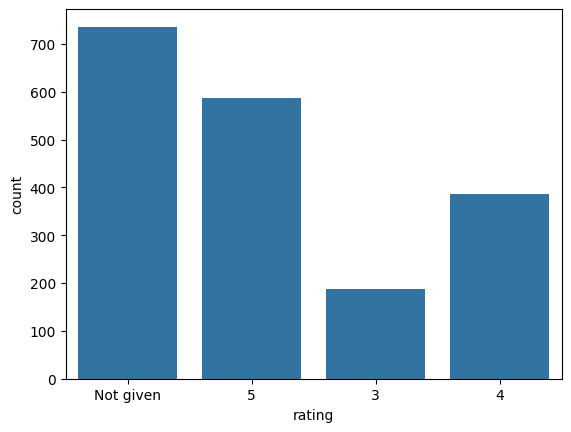

In [51]:
sns.countplot(data=df,x="rating")
plt.show()

Observation 6: From the above observation, it can be seen that, most of the people did not give any ratings. And then, most of the people gave 5 stars.

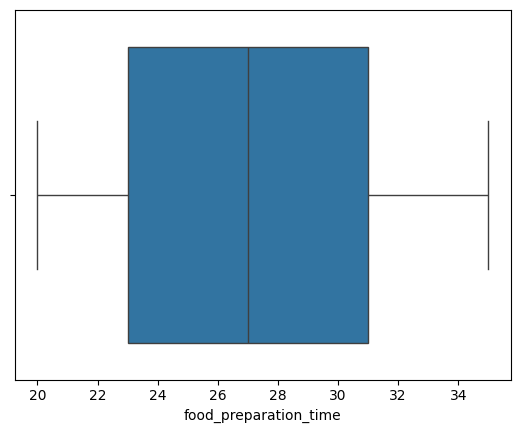

In [53]:
sns.boxplot(data=df, x="food_preparation_time")
plt.show()

Obseravtion 8: From the above observation, it can be seen that minimum time to prepare a food is 20 minutes. The 1st quartile is 23 minutes, median is 27 minutes and 3rd quartile is 31 minutes. And the max time to prepare a food is 35 minutes shown by the whisker line.

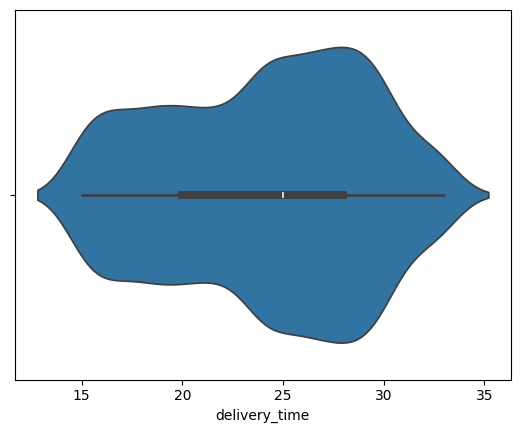

In [54]:
sns.violinplot(data=df, x='delivery_time');

Observation 9: From the above observation, it can be seen that, the mean time of delivery is about 25 minutes. The max time for delivery is about 33 minutes and minimum time is about 15 minutes

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [55]:
# Write the code here
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations: Top 5 restaurants in terms of the number of orders received are 1.Shake Shack(219 orders), 2.The Meatball Shop(132 orders), 3. Blue Ribbon Sushi(119 orders), 4. Blue Ribbon Fried Chicken(96 orders), Parm(68 orders).  


### **Question 8**: Which is the most popular cuisine on weekends?

In [60]:
# Write the code here
weekend_data = df[df['day_of_the_week']=="Weekend"]
cuisine_counts = weekend_data['cuisine_type'].value_counts()
Most_Popular_Cuisine = cuisine_counts.idxmax()
Most_Popular_Cuisine

'American'

#### Observations: From the above we can see, the most popular cuisine on weekends is American.


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [64]:
# Write the code here
order_above_20 = (df['cost_of_the_order']>20).mean() *100
order_above_20

29.24130663856691

#### Observations: About 29.24 percentage of the orders cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time?

In [65]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations: The mean order delivery time is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [66]:
# Write the code here
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations: The Customer_ID 52832 has made 13 orders, The Customer_ID 47440 has made 10 orders and Customer_ID 83287 has made 9 orders.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

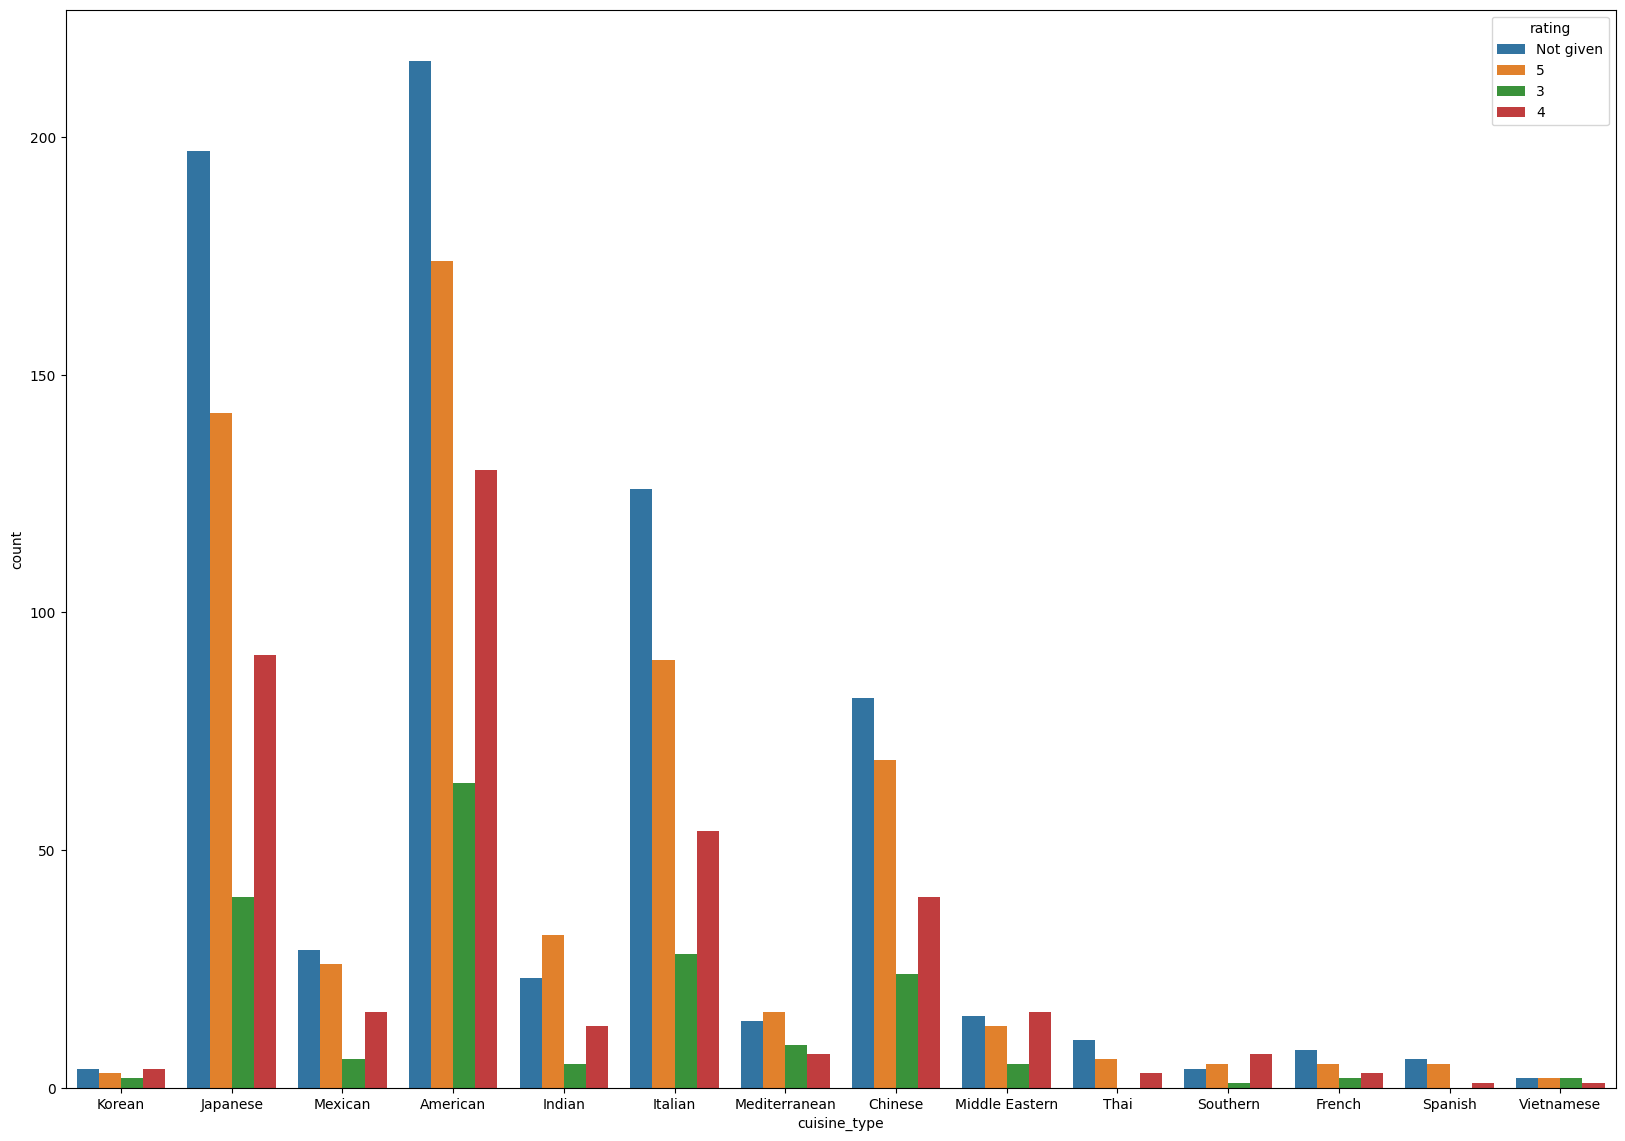

In [86]:
# Write the code here
plt.figure(figsize=(20,14))
sns.countplot(data=df, x='cuisine_type', hue='rating');

Observation 1: From the above observation, it can be said that American cuisine has the best rating. And the Vietnamese has the worst rating.

In [95]:
y = df.groupby('cuisine_type')['restaurant_name'].nunique().reset_index()
y

,cuisine_type,restaurant_name
0,American,41
1,Chinese,16
2,French,3
3,Indian,14
4,Italian,31
5,Japanese,29
6,Korean,5
7,Mediterranean,5
8,Mexican,11
9,Middle Eastern,7


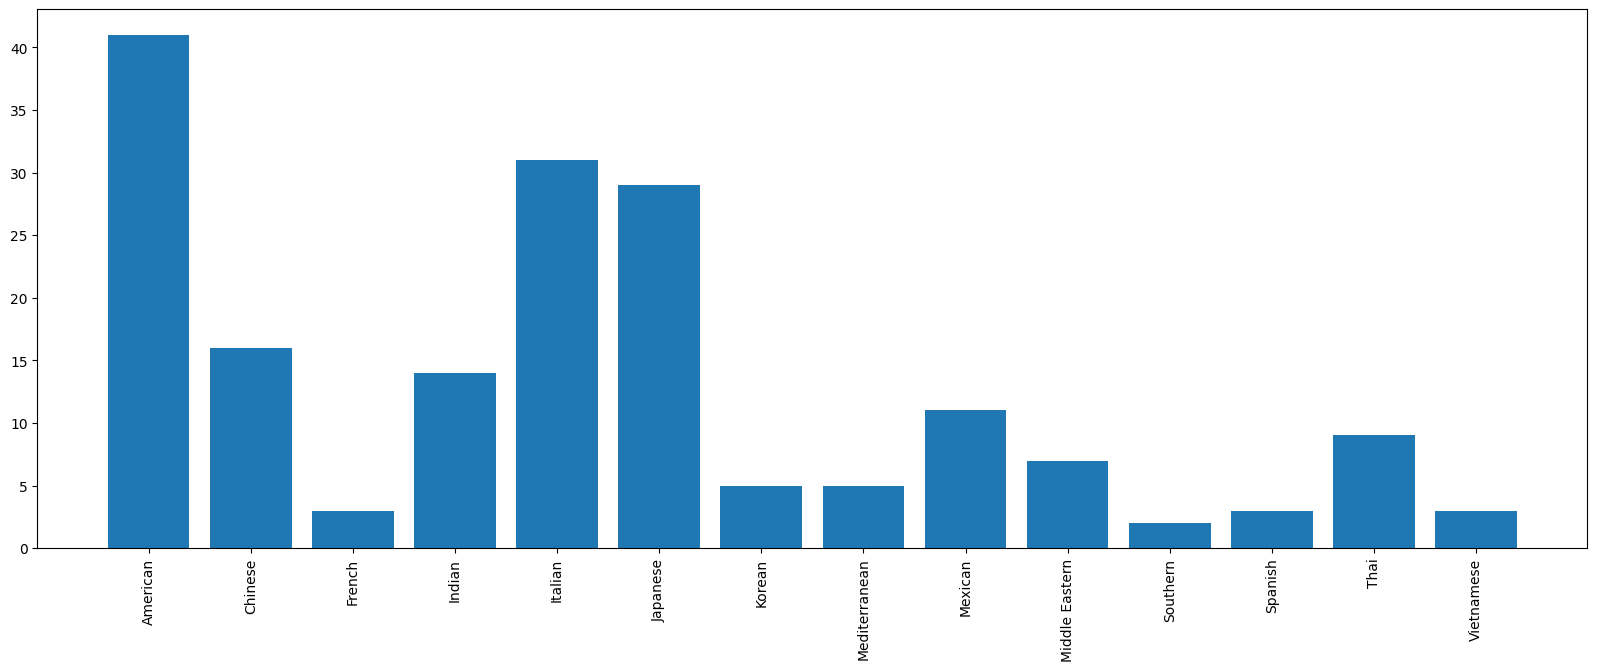

In [96]:
plt.figure(figsize = (20,7))
plt.bar(y['cuisine_type'], y['restaurant_name'])
plt.xticks(rotation=90);

Observation 2: From the above observation it can be easily said that most of the restaurants provide American cuisine. On the other hand, southern cuisine has the least.

<ipython-input-99-34c10a0ede41>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='day_of_the_week', y='cost_of_the_order', kind='bar', estimator = np.sum, palette='pastel');


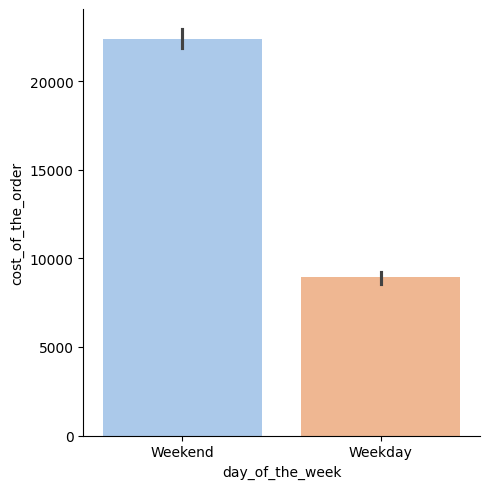

In [99]:
sns.catplot(data=df, x='day_of_the_week', y='cost_of_the_order', kind='bar', estimator = np.sum, palette='pastel');

Observation 3: From the above observation, it can be said that, cost of the order is more than double in the weekend than weekday.

<ipython-input-105-55991a7ef841>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data = df,x = 'cuisine_type', y = 'cost_of_the_order', estimator = np.mean, ci = None);


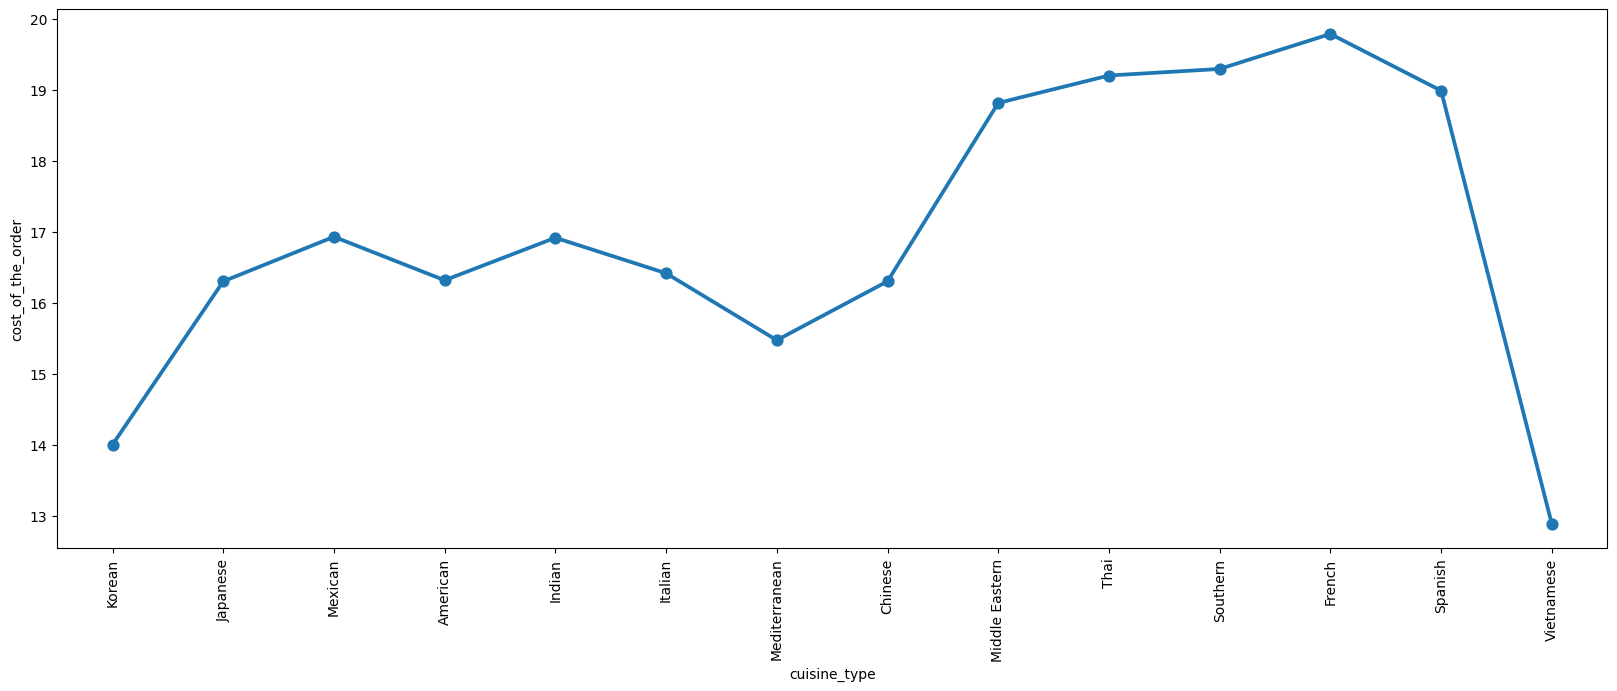

In [105]:
plt.figure(figsize=(20, 7));
sns.pointplot(data = df,x = 'cuisine_type', y = 'cost_of_the_order', estimator = np.mean, ci = None);
plt.xticks(rotation = 90);

Observation 4: From the above observation, it can be said that the French has the highest average cost of the order. Thai, Southern and Spnish cuisine also carries next highest average cost of the order after French.

<ipython-input-120-0dc3c73c6f84>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data = df,x = 'cuisine_type', y = 'food_preparation_time', estimator = np.mean, ci = None);


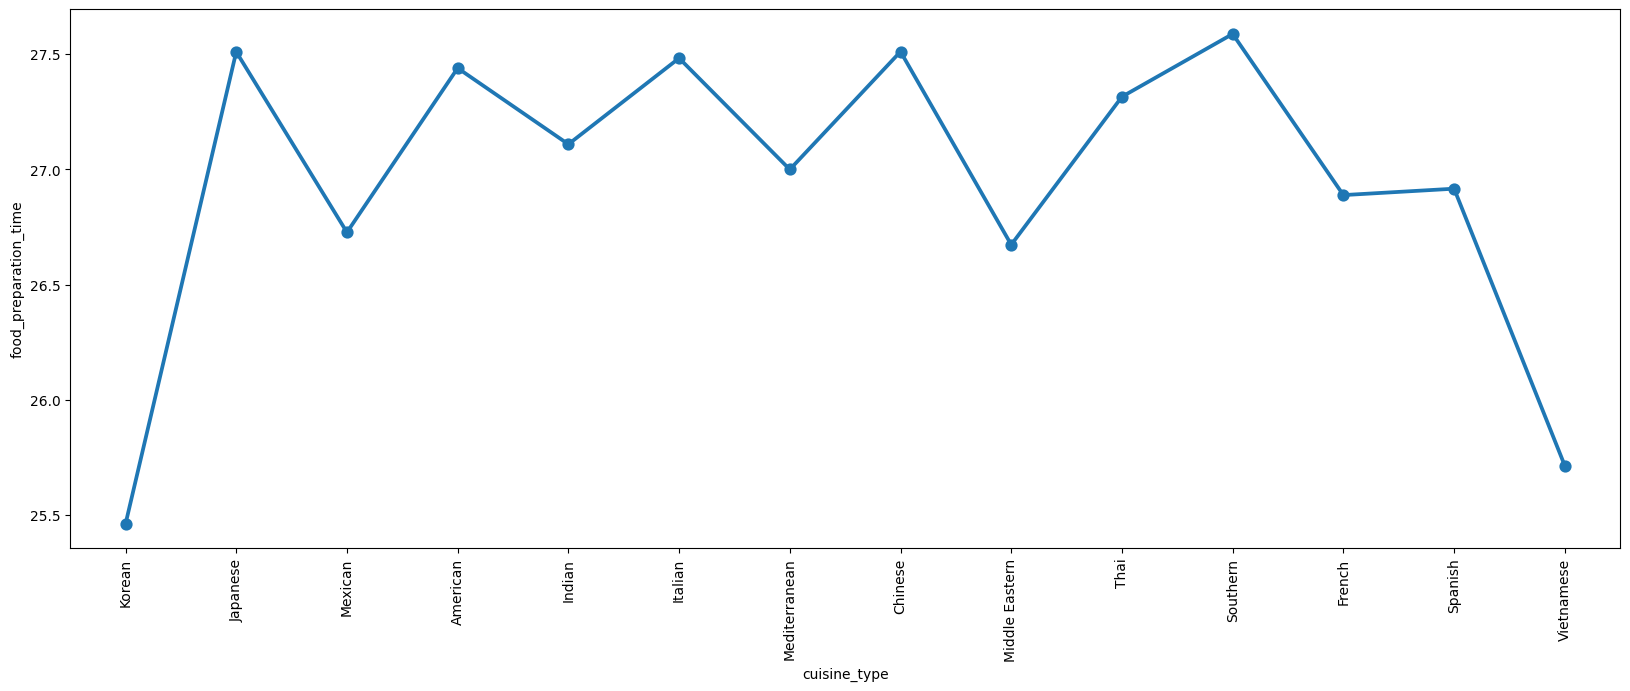

In [120]:
plt.figure(figsize=(20, 7));
sns.pointplot(data = df,x = 'cuisine_type', y = 'food_preparation_time', estimator = np.mean, ci = None);
plt.xticks(rotation = 90);

Observation 5: From the above observation, it can be easily said that Japanese and Southern cuisine takes the highest time to get prepared and the Korean cuisine is preapred very fast.

<ipython-input-122-253b4b8b08b8>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data = df,x = 'delivery_time', y = 'day_of_the_week', ci = None);


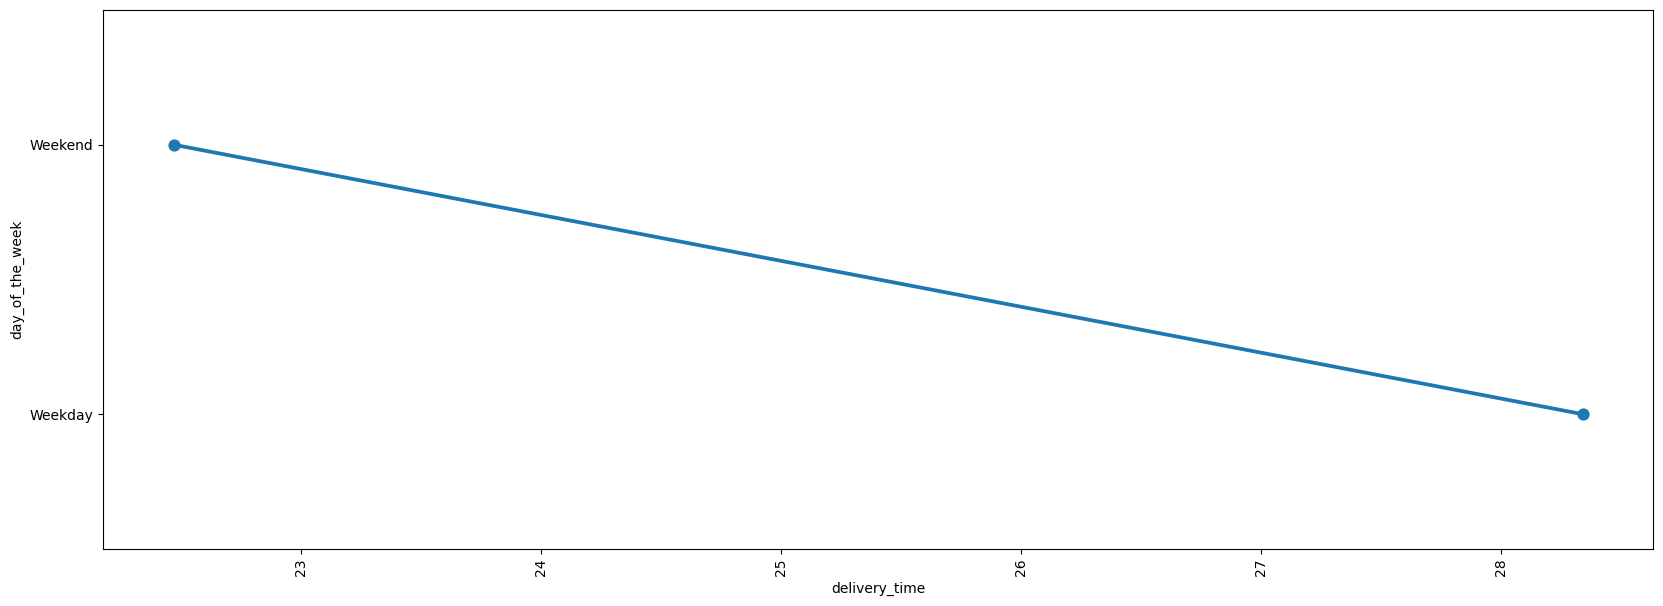

In [122]:
plt.figure(figsize=(20, 7));
sns.pointplot(data = df,x = 'delivery_time', y = 'day_of_the_week', ci = None);
plt.xticks(rotation = 90);

Observation 6: From the above observation, it can be easily said that at the at the, the food delivery takes almost 5 minutes more than a weekday.

<ipython-input-125-838dfc724d5e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[['rating','cost_of_the_order','food_preparation_time','delivery_time']].corr(), annot=True);


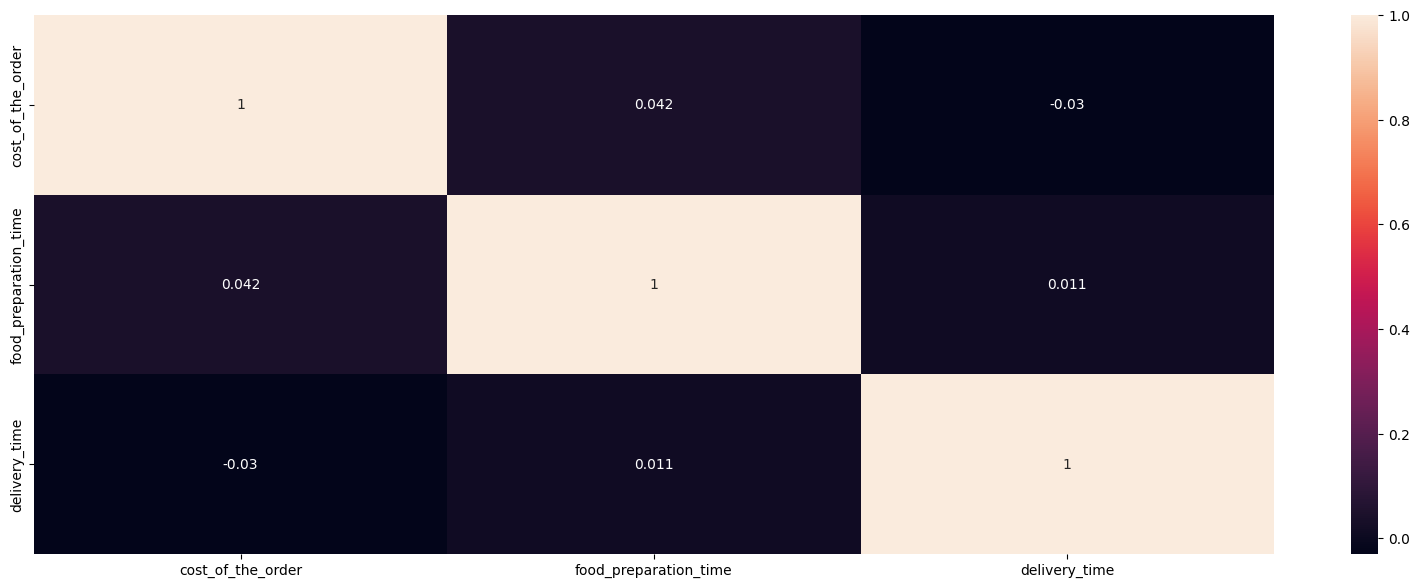

In [125]:
plt.figure(figsize=(20, 7))
sns.heatmap(df[['rating','cost_of_the_order','food_preparation_time','delivery_time']].corr(), annot=True);

Observation 7; From the above observation, it can be easily said that, as the values are all of them almost near to 0, so there is no such correlation between rating,cost_of_the_order,food_preparation_time,delivery_time.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [127]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

filtered_restaurants = df.groupby('restaurant_name').filter(lambda x: x['rating'].count() > 50 and x['rating'].mean() > 4)
restaurants_with_promotional_offer = filtered_restaurants['restaurant_name'].unique()

print("Restaurants eligible for the promotional offer:")
print(restaurants_with_promotional_offer)

Restaurants eligible for the promotional offer:
['Blue Ribbon Fried Chicken' 'The Meatball Shop' 'Shake Shack'
 'Blue Ribbon Sushi']


#### Observations: There are four restaurants which are eligible for the promotional offer and the restaurants are: 'Blue Ribbon Fried Chicken' 'The Meatball Shop' 'Shake Shack'



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [135]:
r1 = df[df['cost_of_the_order']>20]['cost_of_the_order'].sum()*0.25
r2 = df[df['cost_of_the_order']>5]['cost_of_the_order'].sum()*0.15
net_revenue = r1 + r2
net_revenue

8379.539499999999

#### Observations: The net revenue generated by company is 8379.54 dollars.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [136]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,1.7385,49


In [140]:
t1 = (df['total_time']>60).mean()*100
t1

10.537407797681771

#### Observations: 10.54 percent of the orders take more than 60 minutes.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [143]:
# Write the code here
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

In [144]:
df[df['day_of_the_week']=='Weekday']['delivery_time'].mean() - df[df['day_of_the_week']=='Weekend']['delivery_time'].mean()

5.870014357297798

#### Observations: The mean time varies almost 5.87 minutes during weekdays and weekends


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
* American, Japanese, Italian and Chinese are the most popular cuisine types and the Vietnamese is the least popular cuisine type.


* Top 5 restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and
Parm.
* The most food items are valued between 10 to 15 dollars which have been ordered more


* The orders placed in weekends are more than the weekdays
*  The number of people not rating their order is high


* The customers are satisfied with their order as there are no 1 or 2 star ratings
* The food preparation time takes 5 minutes more in the weekdays than the weekends


* Japanese and Southern cuisine takes the highest time to get prepared and the Korean cuisine is preapred very fast.
* It takes minimum 20 minutes and maximum 35 minutes to get the food ready.

* The most popular cuisine on weekends is American.












### Recommendations:

* As we can see, the customer doesn't make big orders through the app. So, by promoting and making some loyalty program can attract the customers to order big amount. For example, if the customer orders more than 20 dollars, the delivery fee will be removed.

* As from the data, there are no loyal customers specifically for the app, by making loyalty program for customer can add extra revenue to the company. For example, customer_id 52832 has ordered most number of orders. By giving him extra points or loyalty points would inspire him to order more food and it will attract more customers also.



* Customers like to eat American, Italian, Chinese, and Japanese food cuisines more than the other cuisines. By adding more food items and decreasing some less favourite cuisines like Vietnamese, Spanish etc would be a great option to add more revenue.

* Most of the customers don't want to rate for the orders. Companies can find a way to reward the customers if they rate their ordered foods. Because without rating, the company cannot solve their problems.



*   The time of preparing the food items are so much. By reducing the time of preparing the food items would make the customers happy.

*  The delivery time in weekdays are so high than the weekends. So, by taking more high speed service or creating an extra service like express by adding extra bucks added by the customers would make the hungry customer happy.






---